# `KNeighborsRegressor` on Diabetes Dataset

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [5]:
# Load the Diabetes dataset
data = load_diabetes()

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [6]:
# Split the dataset into training and test sets
X = df.drop(columns='target').values
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Create and train the KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [8]:
# Make predictions on the test set
y_pred = knn_reg.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print the R-squared value
print("R-squared:", r2)

R-squared: 0.4031244536507893


## Plotting the `Elbow Curve`

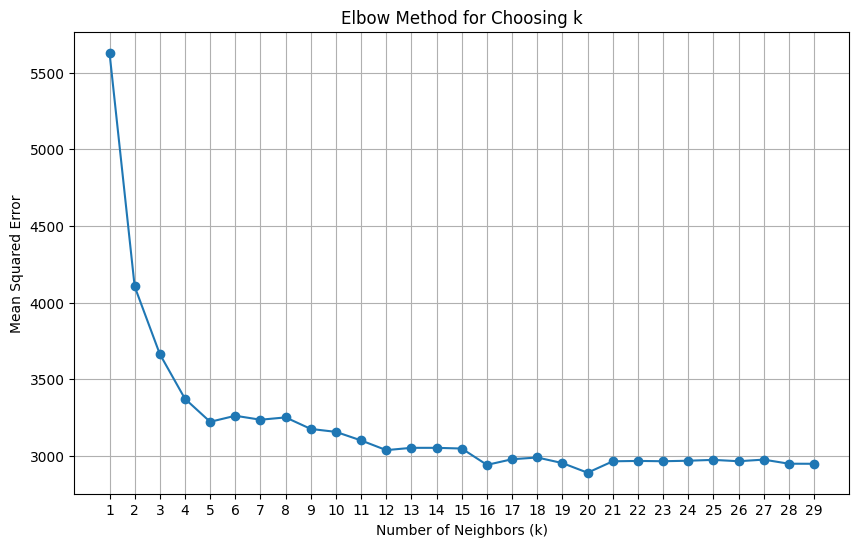

In [13]:
# Define a range of values for k
k_values = np.arange(1, 30)

# Initialize an empty list to store mean squared errors
mse_values = []

# Calculate mean squared error for each value of k
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train, y_train)
    y_pred = knn_reg.predict(X_test)
    mse = np.mean((y_pred - y_test)**2)
    mse_values.append(mse)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o')
plt.title("Elbow Method for Choosing k")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Squared Error")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Plotting `KNeighborsRegressor` on 2D plane

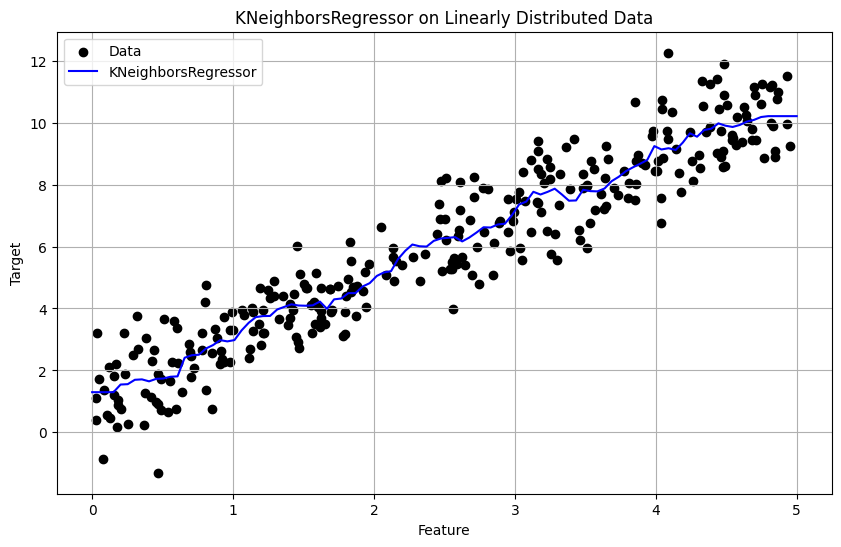

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# Generate synthetic data with a linear relationship
np.random.seed(42)
X = np.sort(5 * np.random.rand(300, 1), axis=0)
y = 2 * X.ravel() + 1 + np.random.randn(300)

# Create and train the KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=20)
knn_reg.fit(X, y)

# Generate data points for prediction
X_pred = np.linspace(0, 5, 100)[:, np.newaxis]

# Make predictions using the KNeighborsRegressor
y_pred = knn_reg.predict(X_pred)

# Plot the original data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label='Data')
plt.plot(X_pred, y_pred, color='blue', label='KNeighborsRegressor')
plt.title("KNeighborsRegressor on Linearly Distributed Data")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.grid(True)
plt.show()